# Week 1: Linear Algebra

In [19]:
#importing libraries
import numpy
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Day 1: Vectors
* Linear Algebra is part of mathematics that deals with the study of vectors and matrices.
* Vectors can be though of as lists of numbers
* From a more abstract perspective, many objects in mathematics can be seen as "vectors".
* We will only deal with vectors which are "lists of (real) numbers".

### Creating vectors

In [2]:
# creating vectors with numpy.array

a = np.array([-1, 2, 0])

b = np.array([2, -2, 3])

c = np.array([1, -1, 0, 0.5])

e = np.ones(3)

O = np.zeros(3)


vec_list = [a, b, c, e, O]
for vector in vec_list:
    print(vector)
    print()

[-1  2  0]

[ 2 -2  3]

[ 1.  -1.   0.   0.5]

[1. 1. 1.]

[0. 0. 0.]



In [3]:
# Vector dimensionality
print(a.size)

print(c.size)

print(O.shape)

3
4
(3,)


### Operations with vectors

In [4]:
# Component-wise operations
summ = a + b #we label this as 'summ' since 'sum' is reserved

diff = a - b

prod = a * b

quot = a / b


list_oper = [summ, diff, prod, quot]
for result in list_oper:
    print(result)
    print()

[1 0 3]

[-3  4 -3]

[-2 -4  0]

[-0.5 -1.   0. ]



In [5]:
# Scalar multiplication
k = -2

k_times_a = k*a
print(k_times_a)
print()

k_times_b = k*b
print(k_times_b)
print()

b_times_k = b*k
print(b_times_k)

[ 2 -4  0]

[-4  4 -6]

[-4  4 -6]


In [6]:
# Combining multiple operations

v = 2*a -3*b - e
print(v)

w = 2*a -3*b - e + c #yields error!
print(w)

[ -9.   9. -10.]


ValueError: operands could not be broadcast together with shapes (3,) (4,) 

### Norms: Vectors Lengths
* **Euclidean**, or **2-norm**: the usual distance in space. Given a vector  $v = (v_1, v_2, \ldots, v_n)$,  its Euclidean norm $\|v\|_2$ is given by: \begin{equation} \|v\|_2 = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left( \sum_{i=1}^{n} v_i^2 \right) ^ {1/2}\end{equation}

In [7]:
# Calculating norms from scratch
# Euclidean norm (usual length)
def norm_of_vector(vector):
    s = 0
    for component in vector:
        s = s + component**2
    s = np.sqrt(s)
    return s

norm_of_vector(e)

1.7320508075688772

* **Minkowski *p*-norm** is a generalization of the Euclidean norm. In short, substitute the 2's with *p*'s and you get a norm of order *p*. Note that $p \geqslant 1$. Thus: \begin{equation} \|v\|_p = \left( \sum_{i=1}^{n} \left|v_i\right|^p \right) ^ {1/p}\end{equation}

In [8]:
# Minkowski's p-norm
def pnorm_of_vector(vector, p):
    s = 0
    for component in vector:
        s = s + abs(component)**p
    s = s**(1.0/p)
    return s

pnorm_of_vector(e, 3)

1.4422495703074083

Special cases of the *p*-norms:

* If $p=1$, then $\|v\|_1 = \sum_{i=1}^{n} |v_i|$. This norm is called **taxicab** or **Manhattan norm**

* If $p \to \infty$, then $\|v\|_\infty = \max\left\{ |v_1|, |v_2|, \ldots, |v_n| \right\}$. This norm is called **max** or **Chebyshev norm**

In [9]:
# Using NumPy's numpy.linalg.norm(x, p)

print(nla.norm(e, 1))

print(nla.norm(e, 2))

print(nla.norm(e, 5))

print(nla.norm(e, np.inf))

3.0
1.7320508075688772
1.2457309396155174
1.0


In [10]:
# Generalize our functions
def pnorm(vector, p):
    if p == 'inf':
        return max(abs(vector))
    elif p == 1:
        return abs(vector).sum()
    else:
        return pow(abs(vector).sum(), 1.0/p)

pnorm(e, 5)

1.2457309396155174

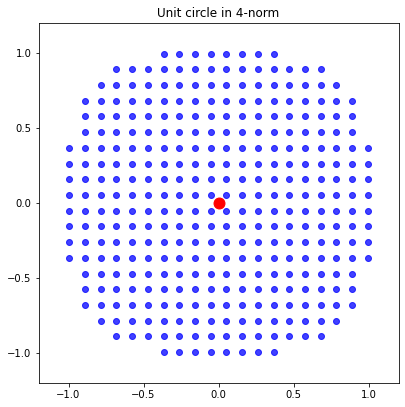

In [11]:
# Plotting a 'unit circle' under different norms
# (unit circle = circle centered at the origin (0,0) with radius = 1)

n = 22 #number of points
p = 4 #norm order

# Plotting using test-points
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
for x in np.linspace(-1.1, 1.1, n):
    for y in np.linspace(-1.1, 1.1, n):
        vector = np.array([x, y])
        if nla.norm(vector, p) <= 1:
            ax.scatter(x, y, c= 'b', alpha=0.75)
ax.scatter(0,0, s = 120, c = 'r')
ax.set_title('Unit circle in '+str(p)+'-norm')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

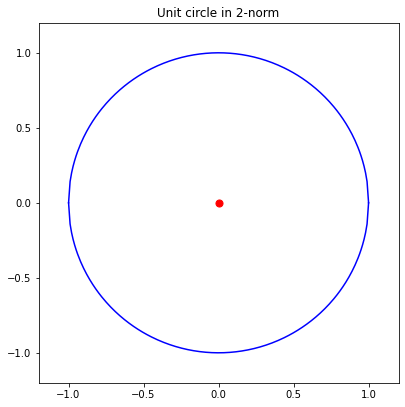

In [12]:
# Plotting a 'unit circle' under different norms
# (unit circle = circle centered at the origin (0,0) with radius = 1)

n = 200
p = 2

x = np.linspace(-1.0, 1.0, n)
y = (1 - np.abs(x)**p)**(1/p)
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(x, y, c = 'b')
ax.plot(x, -y, c = 'b')
ax.scatter(0, 0, s = 50, c = 'r')
ax.set_title('Unit circle in '+str(p)+'-norm')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
plt.show()

* Unit vectors: vectors whose norm is unit, i.e. equal to 1
* This is a norm-dependent concept (depends on what norm we use to measure distances)
* The process of "converting" a vector to a unit vector is called **normalization**. To normalize a vector $v$ we scalar multiply it by the reciprocal of its norm $\|v\|$. In short:
\begin{equation} v_{\text{unit}} = \frac{1}{\|v\|} \cdot v \end{equation}

In [13]:
# Unit Vectors

p = 2
print('a = ', a)
a_unit = a/nla.norm(a, p)
print('a_unit = ', a_unit)
print('The norm of a_unit = ', nla.norm(a_unit, p))
print()


p = np.inf
print('b = ', b)
b_unit = b/nla.norm(a, p)
print('b_unit = ', b_unit)
print('The norm of b_unit = ', nla.norm(b_unit, p))

a =  [-1  2  0]
a_unit =  [-0.4472136   0.89442719  0.        ]
The norm of a_unit =  0.9999999999999999

b =  [ 2 -2  3]
b_unit =  [ 1.  -1.   1.5]
The norm of b_unit =  1.5


### Multiplying Vectors. Angle between two vectors
* Multiplying vectors can be defined in multiple ways. Here we discuss only the **dot-product** of two vectors. If $a = (a_1, a_2, \ldots, a_n)$ and $b = (b_1, b_2, \ldots, b_n)$, then their dot-product is given by:
\begin{equation} a\cdot b = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n \end{equation}
* The result of dot-multiplication of two vectors is a scalarm i.e. a number.

In [ ]:
# Dot-Product of two vectors

print('a = ', a)
print('b = ', b)

print('a.b = ', a.dot(b))

print('b.a = ', b.dot(a))

* If we "normalize" the dot-product of two vectors by dividing it by the product of the Euclidean norms of the vectors, then the resultin number is the **cosine of the angle** between the vectors. In other words, if $\langle a, b \rangle$ is the angle between the vectors $a$ and $b$, then:
\begin{equation} \cos{\langle a, b \rangle} = \frac{a \cdot b}{\|a\|_2 \cdot \|b\|_2} \end{equation}

In [14]:
# Angle between two vectors
u = np.array([1, 0])
v = np.array([2, 1])
w = np.array([-1, 1])

cos_uv = u.dot(v)/(nla.norm(u, 2)*nla.norm(v, 2))
print('cos <u,v> = ', cos_uv)

alpha_uv = np.arccos(cos_uv)
print('<u,v> = %f radians' % alpha_uv)
print('<u,v> = %f degrees' % np.degrees(alpha_uv))


# Function that returns the angle between two vectors
def ang_vec(v, w):
    if v.size == w.size:
        return np.degrees(np.arccos(v.dot(w)/(nla.norm(v,2)*nla.norm(w,2))))
    else:
        print('Error!')

print()
print('<u,v> = %f deg' % ang_vec(u, v))
print('<u,w> = %f deg' % ang_vec(u, w))
print('<v,w> = %f deg' % ang_vec(v, w))

cos <u,v> =  0.8944271909999159
<u,v> = 0.463648 radians
<u,v> = 26.565051 degrees

<u,v> = 26.565051 deg
<u,w> = 135.000000 deg
<v,w> = 108.434949 deg


### Similarity between two vectors
The cosine of the angle between two vectors can be used as a measure of **similarity** or **concordance**.
* $\cos{\langle u, v \rangle} \approx 1 \, \Rightarrow \,  \langle u, v \rangle \approx 0$  (vectors in same general direction)
* $\cos{\langle u, v \rangle} \approx 0 \, \Rightarrow \,  \langle u, v \rangle \approx 90^\circ = \frac{\pi}{2}\text{ rad}$ (vectors are close to perpendicular)
* $\cos{\langle u, v \rangle} \approx -1 \, \Rightarrow \,  \langle u, v \rangle \approx 180^\circ = \pi \text{ rad}$ (vectors are in almost opposite direction)

In [15]:
# Cosine similarity between two vectors

def cos_sim(v, w):
    if v.size == w.size:
        return v.dot(w)/(nla.norm(v,2)*nla.norm(w,2))
    else:
        print('Error!')
        
x = np.array([1, 1, 1, 1])
y = np.array([1.0, 0.5, 0.1, 2.4])
cos_sim(x, y)

0.7548513560963972

In [16]:
# Cosine similarity using scikit-learn (generates similarity matrix)
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

z = np.array([0.5, 0.5, 0.5, 0.4])

# Create 
data = {'x' : x, 'y' : y, 'z' : z}
df = pd.DataFrame(data)

cosine_similarity(df.T)

array([[1.        , 0.75485136, 0.99587059],
       [0.75485136, 1.        , 0.69634332],
       [0.99587059, 0.69634332, 1.        ]])

[[1.         0.51639778 0.36893239]
 [0.51639778 1.         0.45360921]
 [0.36893239 0.45360921 1.        ]]


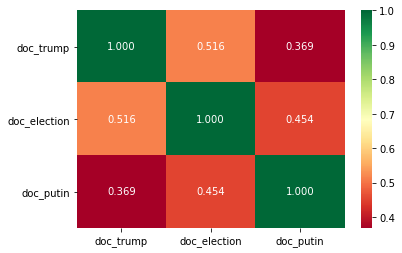

In [17]:
# Example of cosine simiparity application: text analysis
# see: https://www.machinelearningplus.com/nlp/cosine-similarity/ for complete details

# Step 1: Generate the documents
doc_trump = 'Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin'
doc_election = 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election'
doc_putin = 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career'
documents = [doc_trump, doc_election, doc_putin]


# Step 2: Create the document matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
sparse_matrix = count_vectorizer.fit_transform(documents)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc_trump', 'doc_election', 'doc_putin'])


# Step 3: Calculate the cosine similarity for the dataframe df
c_sim = cosine_similarity(df)
print(c_sim)

df_sim = pd.DataFrame(c_sim,
                      columns = ['doc_trump', 'doc_election', 'doc_putin'])


plt.figure()
sns.heatmap(df_sim,
            annot=True,
            fmt='0.3f',
            cmap='RdYlGn',
            yticklabels=df_sim.columns
           )
plt.yticks(rotation=0)
plt.show()

## Practice Assignment: the *iris* dataset
The iris dataset contains data about the length and width of sepals and petals of three varieties of iris flowers (*setosa*, *versicolor* and *virginica*). This is a frequently used dataset in statistics and machine learning. Your task:
* Load the dataset as a Pandas DataFrame
* For every variety of iris flowers, construct the similarity matrix (e.g. a similarity matrix for the *setosa* variety, for the four vectors: sepal_length, sepal_width, petal_length, petal_width)

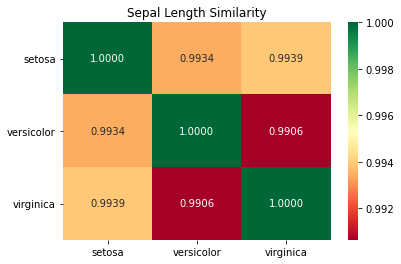

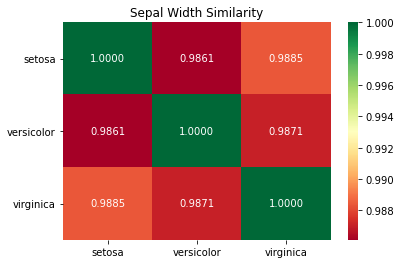

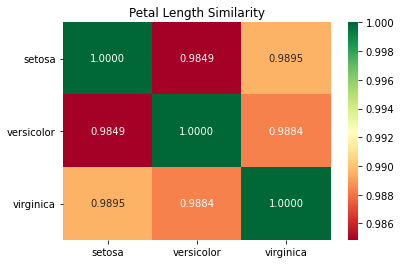

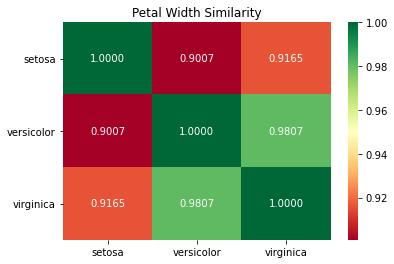

In [18]:
df_iris = pd.read_csv('iris.csv')

df_set = df_iris[df_iris['variety'] == 'Setosa'].drop(columns=['variety'])
df_vers = df_iris[df_iris['variety'] == 'Versicolor'].drop(columns=['variety'])
df_virg = df_iris[df_iris['variety'] == 'Virginica'].drop(columns=['variety'])


sepal_length = {'setosa' : df_set['sepal_length'].values,
                'versicolor' : df_vers['sepal_length'].values,
                'virginica' : df_virg['sepal_length'].values}
sepal_length = pd.DataFrame(sepal_length, columns = ['setosa', 'versicolor', 'virginica'])


sepal_width = {'setosa' : df_set['sepal_width'].values,
               'versicolor' : df_vers['sepal_width'].values,
               'virginica' : df_virg['sepal_width'].values}
sepal_width = pd.DataFrame(sepal_width, columns = ['setosa', 'versicolor', 'virginica'])


petal_length = {'setosa' : df_set['petal_length'].values,
                'versicolor' : df_vers['petal_length'].values,
                'virginica' : df_virg['petal_length'].values}
petal_length = pd.DataFrame(petal_length, columns = ['setosa', 'versicolor', 'virginica'])


petal_width = {'setosa' : df_set['petal_width'].values,
               'versicolor' : df_vers['petal_width'].values,
               'virginica' : df_virg['petal_width'].values}
petal_width = pd.DataFrame(petal_width, columns = ['setosa', 'versicolor', 'virginica'])




# Printing the cosine similarity heatmaps
plt.figure()
sns.heatmap(cosine_similarity(sepal_length.T),
            annot=True,
            fmt='0.4f',
            cmap='RdYlGn',
            yticklabels=sepal_length.columns,
            xticklabels=sepal_length.columns
           )
plt.yticks(rotation=0)
plt.title('Sepal Length Similarity')
plt.show()



plt.figure()
sns.heatmap(cosine_similarity(sepal_width.T),
            annot=True,
            fmt='0.4f',
            cmap='RdYlGn',
            yticklabels=sepal_width.columns,
            xticklabels=sepal_width.columns
           )
plt.yticks(rotation=0)
plt.title('Sepal Width Similarity')
plt.show()



plt.figure()
sns.heatmap(cosine_similarity(petal_length.T),
            annot=True,
            fmt='0.4f',
            cmap='RdYlGn',
            yticklabels=petal_length.columns,
            xticklabels=petal_length.columns
           )
plt.yticks(rotation=0)
plt.title('Petal Length Similarity')
plt.show()


plt.figure()
sns.heatmap(cosine_similarity(petal_width.T),
            annot=True,
            fmt='0.4f',
            cmap='RdYlGn',
            yticklabels=petal_width.columns,
            xticklabels=petal_width.columns
           )
plt.yticks(rotation=0)
plt.title('Petal Width Similarity')
plt.show()

In [ ]:
df_iris